# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import financial_subs as fs

# Data Preprocessing

In [2]:
# Get the data
flex = pd.read_csv('statements/augustcheck1flex.csv')
grocery = pd.read_csv('statements/augustcheck1grocery.csv')
bills = pd.read_csv('statements/augustcheck1bills.csv')

### Renaming and organizing dataframes

In [3]:
# Rename the categories 
flex = fs.rename_categories(flex)
bills = fs.rename_categories(bills)
grocery = fs.rename_categories(grocery)

# Organize known recurring charges
fs.organize_recurring_charges(flex)
fs.organize_recurring_charges(bills)
fs.organize_recurring_charges(grocery)

# Check out the categories left to see if anything is 
unique_flex = pd.DataFrame(flex.Category.unique(), columns=['Category']).sort_values(by='Category')
unique_bills = pd.DataFrame(bills.Category.unique(), columns=['Category']).sort_values(by='Category')
unique_grocery = pd.DataFrame(grocery.Category.unique(), columns=['Category']).sort_values(by='Category')

print ("\nFlex Categories:\n")
fs.print_fancy(unique_flex)
print ("\nBills Categories:\n")
fs.print_fancy(unique_bills)
print ("\nGrocery Categories:\n")
fs.print_fancy(unique_grocery)


Flex Categories:

╒════╤═══════════════════╕
│    │ Category          │
╞════╪═══════════════════╡
│  2 │ Alcohol & Bars    │
├────┼───────────────────┤
│  1 │ Fast Food         │
├────┼───────────────────┤
│ 11 │ Food              │
├────┼───────────────────┤
│  4 │ Gas               │
├────┼───────────────────┤
│  5 │ Gifts & Donations │
├────┼───────────────────┤
│  7 │ Groceries         │
├────┼───────────────────┤
│ 12 │ Income            │
├────┼───────────────────┤
│  9 │ Medical           │
├────┼───────────────────┤
│  6 │ Pets              │
├────┼───────────────────┤
│ 10 │ Reimbursement     │
├────┼───────────────────┤
│  3 │ Shopping          │
├────┼───────────────────┤
│  8 │ Transfer          │
├────┼───────────────────┤
│  0 │ Vending Machine   │
╘════╧═══════════════════╛

Bills Categories:

╒════╤═══════════════════╕
│    │ Category          │
╞════╪═══════════════════╡
│  7 │ Bills & Utilities │
├────┼───────────────────┤
│  1 │ Entertainment     │
├────┼──────────

### Inspect any funky categories

In [5]:
# Create a df to hold all transactions for analysis
all = pd.concat([flex, grocery, bills])
all = all.sort_values(by='Date')

# Print any categories of interest to see what is in there
fs.print_category(all, 'Gifts & Donations')
fs.print_category(all, 'Food')

╒════╤════════════╤═══════════════╤══════════════════════════════════════════╤═══════════════════╤══════════╤══════════╕
│    │ Date       │ Description   │ Original Description                     │ Category          │   Amount │ Status   │
╞════╪════════════╪═══════════════╪══════════════════════════════════════════╪═══════════════════╪══════════╪══════════╡
│  8 │ 2024-08-09 │ Austinpride   │ PAYPAL *AUSTINPRIDE      4029357733   CA │ Gifts & Donations │   -22.53 │ Posted   │
╘════╧════════════╧═══════════════╧══════════════════════════════════════════╧═══════════════════╧══════════╧══════════╛
╒════╤════════════╤════════════════╤══════════════════════════════════════════╤════════════╤══════════╤══════════╕
│    │ Date       │ Description    │ Original Description                     │ Category   │   Amount │ Status   │
╞════╪════════════╪════════════════╪══════════════════════════════════════════╪════════════╪══════════╪══════════╡
│ 22 │ 2024-08-06 │ Sodexo         │ FRONTLINE FOO

### Renaming 'Uncategorized' Category

In [6]:
# See whats in the Uncategorized category - we want to see nothing in here
fs.print_category(all, 'Uncategorized')

╒════════╤═══════════════╤════════════════════════╤════════════╤══════════╤══════════╕
│ Date   │ Description   │ Original Description   │ Category   │ Amount   │ Status   │
╞════════╪═══════════════╪════════════════════════╪════════════╪══════════╪══════════╡
╘════════╧═══════════════╧════════════════════════╧════════════╧══════════╧══════════╛


# Analysis

### Flex Summary

╒════╤════════════╤══════════════════════════╤═════════════════════════════════════════════╤═══════════════════╤══════════╤══════════╕
│    │ Date       │ Description              │ Original Description                        │ Category          │   Amount │ Status   │
╞════╪════════════╪══════════════════════════╪═════════════════════════════════════════════╪═══════════════════╪══════════╪══════════╡
│  0 │ 2024-08-15 │ American Food N Vendi    │ AMERICAN FOOD N VENDI    SAN ANTONIO  TX    │ Vending Machine   │    -5.45 │ Posted   │
├────┼────────────┼──────────────────────────┼─────────────────────────────────────────────┼───────────────────┼──────────┼──────────┤
│  1 │ 2024-08-13 │ Starbucks                │ STARBUCKS STORE 10617    ROUND ROCK   TX    │ Fast Food         │   -12.91 │ Posted   │
├────┼────────────┼──────────────────────────┼─────────────────────────────────────────────┼───────────────────┼──────────┼──────────┤
│  2 │ 2024-08-13 │ Starbucks                │ STARBUCK

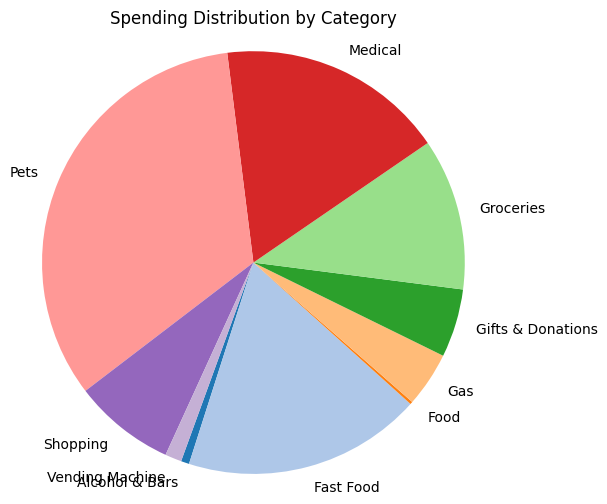

In [7]:
flex_income = fs.get_income(flex)
flex_expense = fs.get_expenses(flex)

fs.print_fancy(flex)
fs.print_stats(flex_income, flex_expense, "Flex")
      
spending_by_category = fs.get_visualization_df(flex, 1)
fs.show_pie_chart(spending_by_category)

### Bills Summary

╒════╤════════════╤═════════════════════════════════════╤═════════════════════════════════════════════╤═══════════════════╤══════════╤══════════╕
│    │ Date       │ Description                         │ Original Description                        │ Category          │   Amount │ Status   │
╞════╪════════════╪═════════════════════════════════════╪═════════════════════════════════════════════╪═══════════════════╪══════════╪══════════╡
│  0 │ 2024-08-19 │ Green Mesquite                      │ GREEN MESQUITE           AUSTIN       TX    │ Food              │   -42.45 │ Posted   │
├────┼────────────┼─────────────────────────────────────┼─────────────────────────────────────────────┼───────────────────┼──────────┼──────────┤
│  2 │ 2024-08-14 │ Walgreens                           │ WALGREENS STORE 12352 F  SAN ANTONIO  TX    │ Pharmacy          │   -12.18 │ Posted   │
├────┼────────────┼─────────────────────────────────────┼─────────────────────────────────────────────┼───────────────────┼─

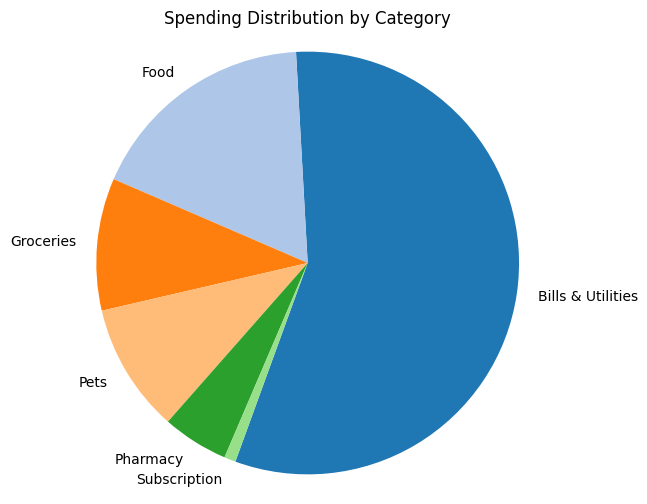

In [8]:
# DROP THE KILL TONY TICKETS AS A ONE OFF - REMOVE LATER
bills = bills[bills['Description'] != 'Ticketmaster']

bills_income = fs.get_income(bills)
bills_expense = fs.get_expenses(bills)

fs.print_fancy(bills)
fs.print_stats(bills_income, bills_expense, "Bills")
      
spending_by_category = fs.get_visualization_df(bills, 1)
fs.show_pie_chart(spending_by_category)

### Grocery Summary

╒════╤════════════╤════════════════════════╤══════════════════════════════════════════╤═════════════════╤══════════╤══════════╕
│    │ Date       │ Description            │ Original Description                     │ Category        │   Amount │ Status   │
╞════╪════════════╪════════════════════════╪══════════════════════════════════════════╪═════════════════╪══════════╪══════════╡
│  0 │ 2024-08-19 │ H-E-B                  │ H-E-B #673               ROUND ROCK   TX │ Groceries       │  -183.45 │ Posted   │
├────┼────────────┼────────────────────────┼──────────────────────────────────────────┼─────────────────┼──────────┼──────────┤
│  1 │ 2024-08-19 │ H-E-B                  │ H-E-B #673               ROUND ROCK   TX │ Groceries       │   -32.91 │ Posted   │
├────┼────────────┼────────────────────────┼──────────────────────────────────────────┼─────────────────┼──────────┼──────────┤
│  2 │ 2024-08-19 │ H-E-B                  │ H-E-B #673               ROUND ROCK   TX │ Groceries       

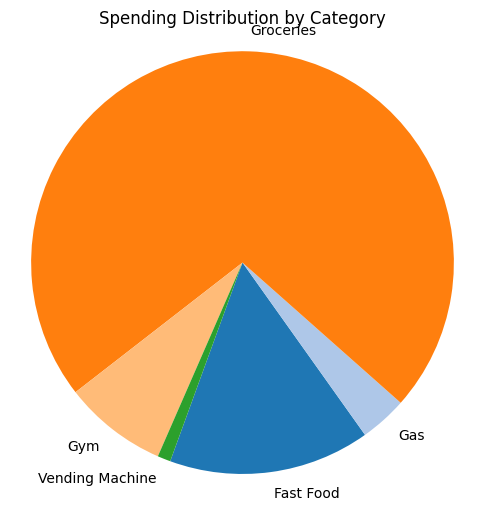

In [9]:
grocery_income = fs.get_income(grocery)
grocery_expense = fs.get_expenses(grocery)

fs.print_fancy(grocery)
fs.print_stats(grocery_income, grocery_expense, "Grocery")
      
spending_by_category = fs.get_visualization_df(grocery, 1)
fs.show_pie_chart(spending_by_category)

# Visualizations

### Spending by Category

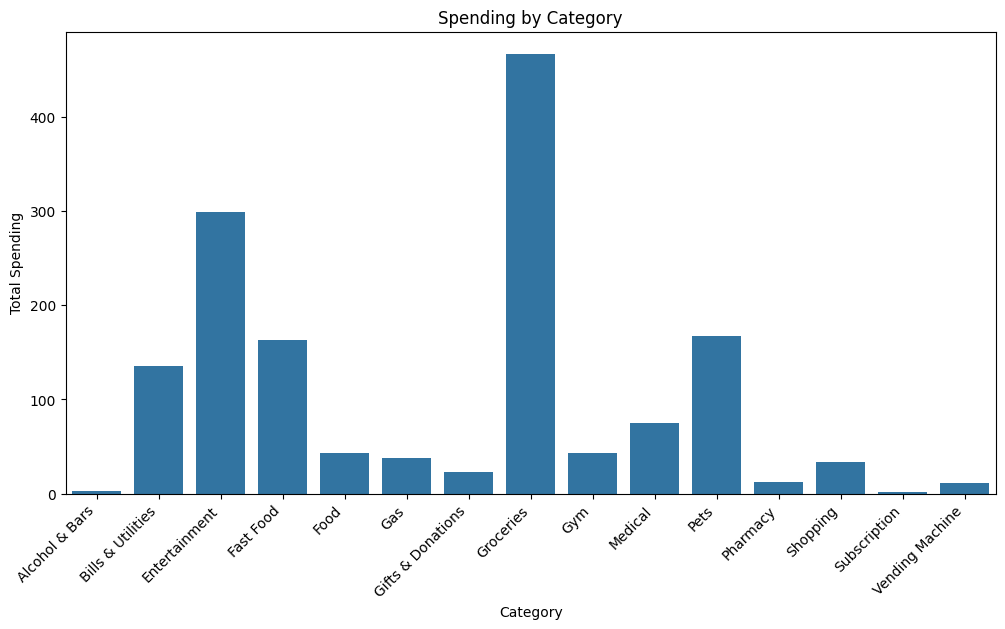

In [10]:
filtered_df = all[(all['Amount'] < 0) & (all['Category'] != 'Transfer')]
filtered_df.loc[:, 'Amount'] = filtered_df['Amount'].abs()
spending_by_category = filtered_df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=spending_by_category.index, y=spending_by_category.values)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Spending by Category')
plt.show()

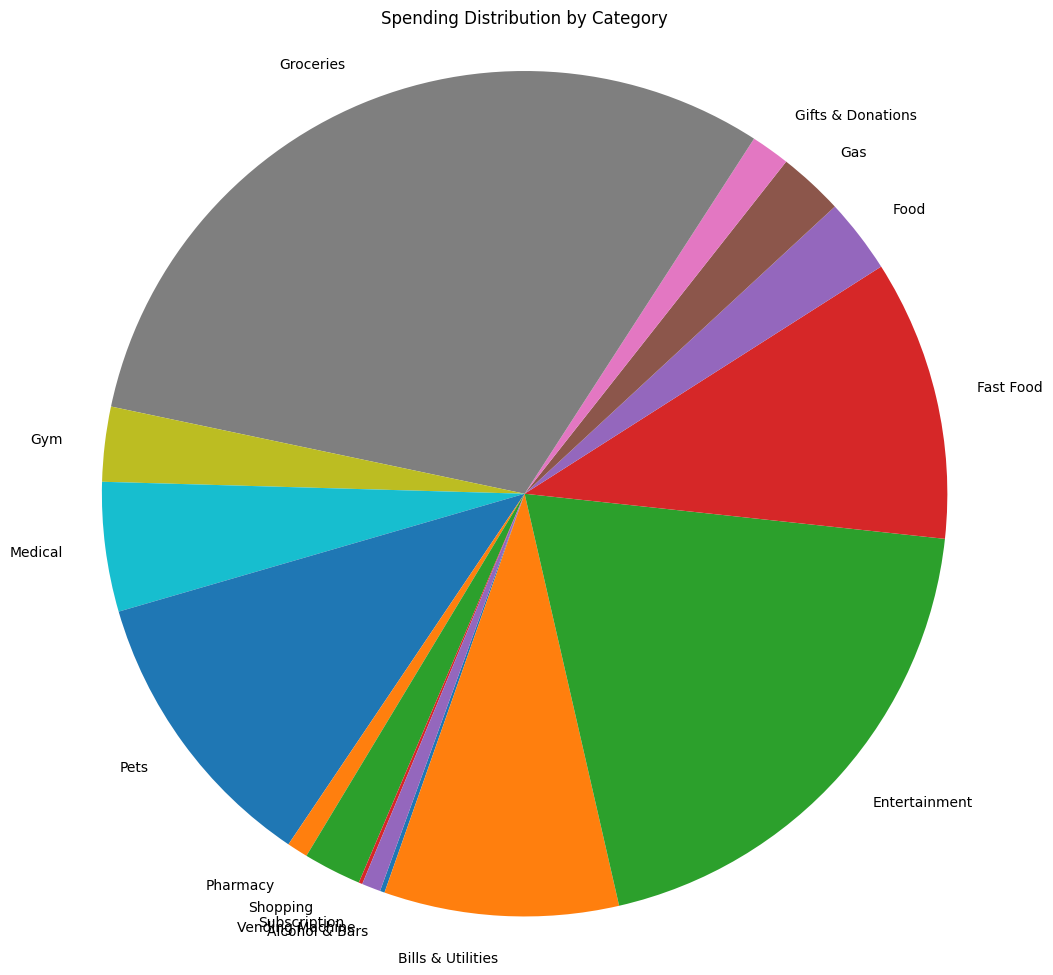

In [11]:
plt.figure(figsize=(12 ,12))
plt.pie(spending_by_category, labels=spending_by_category.index, startangle=250)
plt.axis('equal')
plt.title('Spending Distribution by Category')
plt.show()